# Library

In [1]:
import os, sys
#used for searching files of specific pattern
from glob import glob

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
from skimage.io import imread_collection
import matplotlib.image as map_img
from matplotlib.image import imread

In [4]:
sns.set()

In [5]:
from PIL import Image
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics
from time import sleep
from tqdm.notebook import tqdm

# Fetching Images Folders

In [6]:
# very_mild=glob(r"C:\Users\titik\OneDrive\Desktop\PBL-1\Dataset\Dataset\Very_Mild_Demented\*")
Aloevera=glob(r"C:\Users\anura\try and error\project_images\Aloevera\*")

In [8]:
# very_mild=glob(r"C:\Users\titik\OneDrive\Desktop\PBL-1\Dataset\Dataset\Very_Mild_Demented\*")
Aloevera_leaf=glob(r"C:\Users\anura\try and error\project_images\Aloevera leaf\*")

In [10]:
# very_mild=glob(r"C:\Users\titik\OneDrive\Desktop\PBL-1\Dataset\Dataset\Very_Mild_Demented\*")
Tulsi=glob(r"C:\Users\anura\try and error\project_images\Tulasi\*")

In [12]:
# very_mild=glob(r"C:\Users\titik\OneDrive\Desktop\PBL-1\Dataset\Dataset\Very_Mild_Demented\*")
Tulsi_leaves=glob(r"C:\Users\anura\try and error\project_images\Tulsi leaves\*")

# Image Info

C:\Users\anura\try and error\project_images\Tulsi leaves\20190822_173631.jpg
Non Demented image data
Image shape:(1860, 4032, 3)


array([[[244, 214, 154],
        [244, 214, 154],
        [245, 215, 155],
        ...,
        [ 19,  21,  10],
        [ 21,  23,  12],
        [ 19,  21,  10]],

       [[245, 215, 155],
        [245, 215, 155],
        [246, 216, 156],
        ...,
        [ 18,  20,   9],
        [ 19,  21,  10],
        [ 19,  21,  10]],

       [[244, 214, 154],
        [245, 215, 155],
        [246, 216, 156],
        ...,
        [ 23,  25,  14],
        [ 21,  23,  12],
        [ 21,  23,  12]],

       ...,

       [[247, 218, 152],
        [248, 219, 153],
        [250, 219, 154],
        ...,
        [ 30,  62,  15],
        [ 33,  62,  18],
        [ 32,  61,  17]],

       [[248, 219, 153],
        [248, 219, 153],
        [249, 218, 153],
        ...,
        [ 28,  60,  13],
        [ 33,  62,  18],
        [ 32,  61,  17]],

       [[248, 219, 153],
        [248, 219, 153],
        [249, 218, 153],
        ...,
        [ 26,  58,  11],
        [ 32,  61,  17],
        [ 32,  61,  17]]

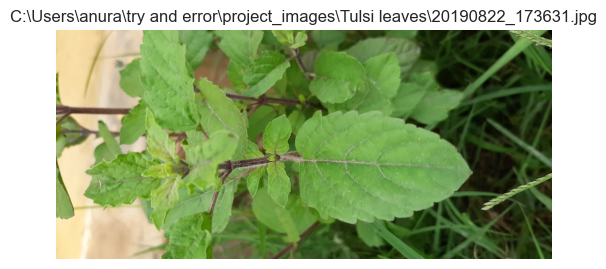

In [14]:
print(Tulsi_leaves[1])
def view_image(directory):
    img=map_img.imread(directory)
    plt.imshow(img)
    plt.title(directory)
    plt.axis('off')
    print(f'Image shape:{img.shape}')
    return img
print('Non Demented image data')
view_image(Tulsi_leaves[1])

C:\Users\anura\try and error\project_images\Tulasi\263.jpg
Tulsi image data
Image shape:(283, 600, 3)


array([[[191, 173, 161],
        [191, 173, 161],
        [193, 175, 163],
        ...,
        [188, 166, 152],
        [185, 163, 149],
        [191, 169, 155]],

       [[190, 172, 160],
        [191, 173, 161],
        [193, 175, 163],
        ...,
        [189, 167, 153],
        [183, 161, 147],
        [180, 158, 144]],

       [[195, 177, 165],
        [197, 179, 167],
        [199, 181, 169],
        ...,
        [214, 192, 178],
        [211, 189, 175],
        [200, 178, 164]],

       ...,

       [[219, 197, 183],
        [220, 198, 184],
        [204, 185, 171],
        ...,
        [189, 173, 157],
        [194, 178, 162],
        [186, 170, 154]],

       [[223, 201, 187],
        [236, 214, 200],
        [229, 210, 196],
        ...,
        [191, 175, 159],
        [190, 174, 158],
        [180, 164, 148]],

       [[219, 196, 180],
        [244, 222, 208],
        [248, 229, 215],
        ...,
        [194, 177, 161],
        [188, 171, 155],
        [175, 158, 142]]

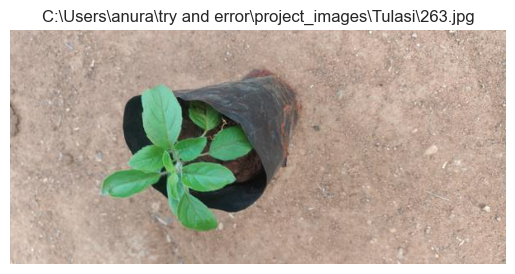

In [15]:
print(Tulsi[2])
print('Tulsi image data')
view_image(Tulsi[2])

C:\Users\anura\try and error\project_images\Aloevera leaf\100.jpg
Mild Demented image data
Image shape:(600, 450, 3)


array([[[177, 171, 173],
        [168, 164, 165],
        [155, 150, 154],
        ...,
        [101,  97,  94],
        [103, 104, 106],
        [121, 125, 128]],

       [[164, 158, 162],
        [170, 165, 169],
        [168, 166, 169],
        ...,
        [114, 110, 107],
        [108, 109, 111],
        [124, 128, 131]],

       [[160, 155, 161],
        [176, 174, 179],
        [175, 174, 179],
        ...,
        [120, 116, 115],
        [115, 115, 115],
        [131, 132, 134]],

       ...,

       [[155, 157, 169],
        [142, 144, 156],
        [166, 168, 180],
        ...,
        [ 86,  82,  83],
        [ 80,  78,  83],
        [ 76,  74,  79]],

       [[146, 148, 160],
        [132, 134, 146],
        [164, 166, 178],
        ...,
        [ 97,  93,  94],
        [ 86,  84,  89],
        [ 83,  81,  86]],

       [[138, 140, 152],
        [128, 130, 142],
        [166, 168, 180],
        ...,
        [ 96,  92,  93],
        [ 85,  83,  88],
        [ 83,  81,  86]]

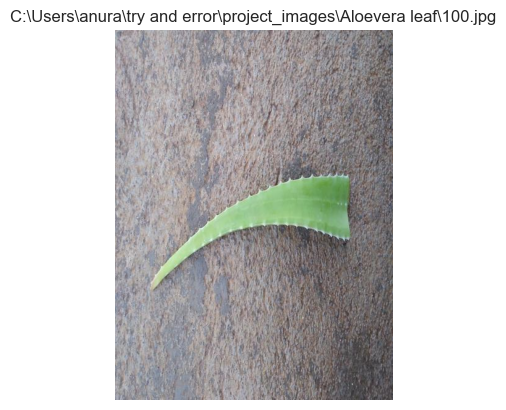

In [16]:
print(Aloevera_leaf[1])
print('Mild Demented image data')
view_image(Aloevera_leaf[1])

C:\Users\anura\try and error\project_images\Aloevera\340.jpg
Mild Demented image data
Image shape:(283, 600, 3)


array([[[222, 178, 139],
        [220, 176, 137],
        [218, 174, 135],
        ...,
        [183, 198, 205],
        [181, 196, 203],
        [181, 196, 203]],

       [[225, 181, 142],
        [222, 178, 139],
        [218, 174, 135],
        ...,
        [182, 197, 204],
        [181, 196, 203],
        [181, 196, 203]],

       [[221, 177, 138],
        [222, 178, 139],
        [224, 180, 141],
        ...,
        [182, 197, 204],
        [181, 196, 203],
        [181, 196, 203]],

       ...,

       [[223, 184, 145],
        [220, 181, 142],
        [206, 167, 128],
        ...,
        [121, 144, 152],
        [117, 140, 148],
        [120, 143, 151]],

       [[222, 183, 144],
        [219, 180, 141],
        [206, 167, 128],
        ...,
        [114, 137, 145],
        [110, 133, 141],
        [115, 138, 146]],

       [[220, 181, 142],
        [218, 179, 140],
        [205, 166, 127],
        ...,
        [106, 129, 137],
        [103, 126, 134],
        [110, 133, 141]]

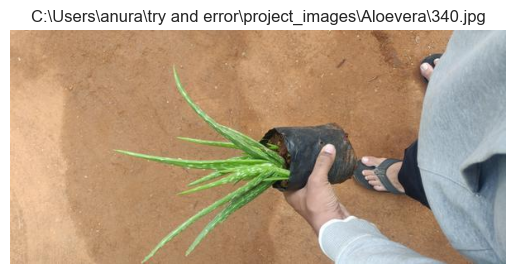

In [17]:

print(Aloevera[1])
print('Mild Demented image data')
view_image(Aloevera[1])

# Preprocessing

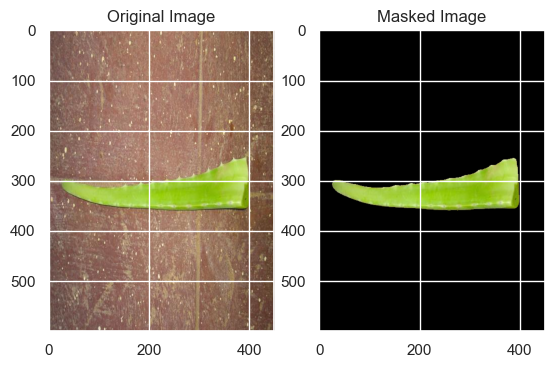

True

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Read the image
img = cv2.imread(r"C:\Users\anura\try and error\project_images\Aloevera leaf\2.jpg")

# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Threshold using inRange
range1 = (30, 40, 40)
range2 = (80, 255, 255)
mask = cv2.inRange(hsv, range1, range2)

# Antialias mask
mask = cv2.GaussianBlur(mask, (0, 0), sigmaX=3, sigmaY=3, borderType=cv2.BORDER_DEFAULT)
mask = exposure.rescale_intensity(mask, in_range=(127.5, 255), out_range=(0, 255))

# Apply the mask to the original image
result = img.copy()
result[mask == 0] = (0, 0, 0)

# Display the images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Masked Image')

plt.show()

# Write result to disk
cv2.imwrite("mask2.png", mask)
cv2.imwrite("acersmall_bg2white.jpg", cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

In [19]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# from skimage import exposure
# import os

# # Define the folder containing the images
# folder_path = r"C:\Users\anura\mini_project\project_images\Aloevera leaf/"

# # Get a list of all files (images) in the folder
# file_list = os.listdir(folder_path)

# # Threshold using inRange
# range1 = (30, 40, 40)
# range2 = (80, 255, 255)

# # Loop through each file in the folder
# for file_name in file_list:
#     if file_name.endswith(('.jpg', '.png', '.jpeg')):  # Check if the file is an image file
#         # Read the image
#         img_path = os.path.join(folder_path, file_name)
#         img = cv2.imread(img_path)

#         # Convert to HSV
#         hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#         # Threshold using inRange
#         mask = cv2.inRange(hsv, range1, range2)

#         # Antialias mask
#         mask = cv2.GaussianBlur(mask, (0, 0), sigmaX=3, sigmaY=3, borderType=cv2.BORDER_DEFAULT)
#         mask = exposure.rescale_intensity(mask, in_range=(127.5, 255), out_range=(0, 255))

#         # Apply the mask to the original image
#         result = img.copy()
#         result[mask == 0] = (255,255,255)
        

#         # Display the images
#         plt.subplot(1, 2, 1)
#         plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#         plt.title('Original Image')

#         plt.subplot(1, 2, 2)
#         plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
#         plt.title('Masked Image')

#         plt.show()

#         # Save the masked image to a new file
#         masked_img_path = os.path.join(r"C:\Users\anura\mini_project\project_images\output\maskes_images", "masked_" + file_name)
#         cv2.imwrite(masked_img_path, cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

In [20]:
#normalizing pixel , resizing and reshaping
import matplotlib.image as mpimg
from skimage.transform import resize
def extract_feature(dir_path):
    img = mpimg.imread(dir_path)
    img = img/255.0
    img = resize(img,(128,128,3))
    img = np.reshape(img,(128,384))
    return img

In [21]:
Aloevera_alz = [extract_feature(filename) for filename in Aloevera]
Aloevera_leaf_alz = [extract_feature(filename) for filename in Aloevera_leaf]
Tulsi = [extract_feature(filename) for filename in Tulsi]
Tulsi_leaves= [extract_feature(filename) for filename in Tulsi_leaves]

In [22]:
#concatenated all data
all_data = Aloevera_alz + Aloevera_leaf_alz
all_data1 =Tulsi+ Tulsi_leaves
data = np.concatenate((np.array(all_data ),np.array(all_data1)))

In [23]:
data = data.reshape(data.shape[0], np.product(data.shape[1:]))

# Splitting Data intoTraining and Testing

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [25]:
#standardize to mean 0 and unit variance
x = scaler.transform(data)

In [26]:
from sklearn.model_selection import train_test_split

all_data = Aloevera_alz + Aloevera_leaf_alz
all_data1 =Tulsi+ Tulsi_leaves
y = [0]*len(all_data) + [1]*len(all_data1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

In [27]:
from sklearn import decomposition, preprocessing, svm

scale = preprocessing.StandardScaler()
#Compressing the images into two dimensions using PCA
pca = decomposition.PCA(200)
X_proj = pca.fit_transform(x_train)

In [28]:
#let's first see which principal component works better
#scree plot but cumulative
# Getting the cumulative variance 
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100 #100 is multiplied for percentage

In [23]:
#****
# How many PCs explain 90% of the variance?
k = np.argmax(var_cumu>80)
print("Number of components explaining 80% variance: "+ str(k)) #I guess, I will have to use 160 axis
#print("\n")

Number of components explaining 80% variance: 34


[[  5.46979376   7.6267498    5.61894662 ...  -0.54271499  -0.80670071
   -1.45099794]
 [-16.68235598 -15.93570845   5.48736959 ...   0.74604808  -0.99205919
   -0.35770408]
 [  6.10223368   8.72873167   3.24075835 ...   0.07968287  -0.67674847
    0.55111797]
 ...
 [ 23.5863917   -8.82503081  -1.81997418 ...   0.67792797  -0.3777736
   -0.18630835]
 [ 21.73304635  -5.31168128  -7.14096475 ...   1.20220818  -1.0800205
   -0.11839596]
 [ 25.25021326  -7.87095549  -7.3111098  ...  -0.83060864  -0.88869364
    1.77996714]]


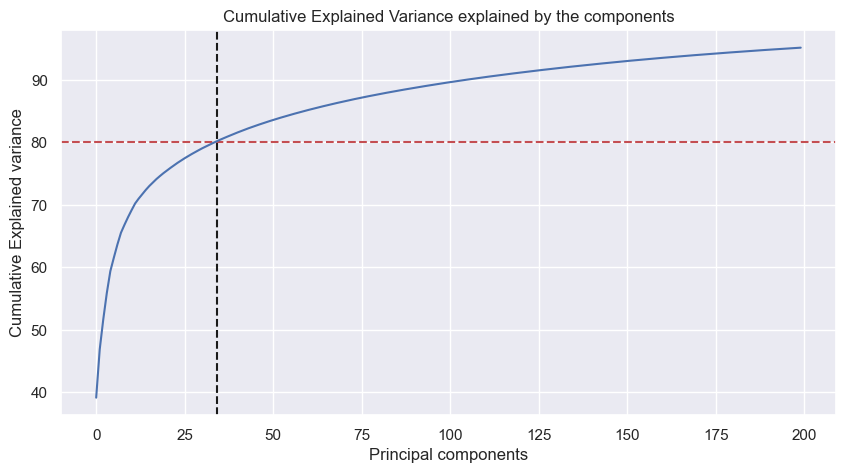

In [24]:
plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=80, color="r", linestyle="--")
ax = plt.plot(var_cumu)

print(X_proj)

# LDA (Linear Discriminant Analysis)

In [80]:
#classifier and dimenion and reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train_LDA = lda.fit_transform(x_train, y_train)
X_test_LDA = lda.transform(x_test)
accuracy = lda.score(x_test, y_test)
print(accuracy*100, '% accuracy (testing data)' )
accuracy_train = lda.score(x_train, y_train)

64.70588235294117 % accuracy (testing data)


# SVM(Support Vector Machine)

In [85]:
# SVM for detection
#List where arrays shall be stored
resized_image_array=[]
#List that will store the answer if an image is female (0) or male (1)
resized_image_array_label=[]

width = 256
height = 256
new_size = (width,height) #the data is just black to white 

### 1.SVM Using RBF

In [78]:
#Train a SVM using RBF kernel
# Assuming your image data is in the shape (num_samples, height, width, channels)
# You need to flatten each image to be a 1D array

# Flatten the image data
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Train a SVM using RBF kernel
clf = svm.SVC(kernel='rbf')
clf.fit(x_train_flat, y_train)

# Store predictions and ground truth for training data
y_pred_train = clf.predict(x_train_flat)
y_true_train = y_train

# Use the SVM model to predict test data
y_pred_test = clf.predict(x_test_flat)
y_true_test = y_test

# Assess the performance of the SVM on testing data
print('\nTesting Data:')
print('Accuracy:', metrics.accuracy_score(y_true_test, y_pred_test))
print('Precision:', metrics.precision_score(y_true_test, y_pred_test))
print('Recall:', metrics.recall_score(y_true_test, y_pred_test))
print('F1 Score:', metrics.f1_score(y_true_test, y_pred_test))
print('Confusion Matrix:', metrics.confusion_matrix(y_true_test, y_pred_test))


Testing Data:
Accuracy: 0.7712418300653595
Precision: 0.8888888888888888
Recall: 0.5714285714285714
F1 Score: 0.6956521739130435
Confusion Matrix: [[78  5]
 [30 40]]


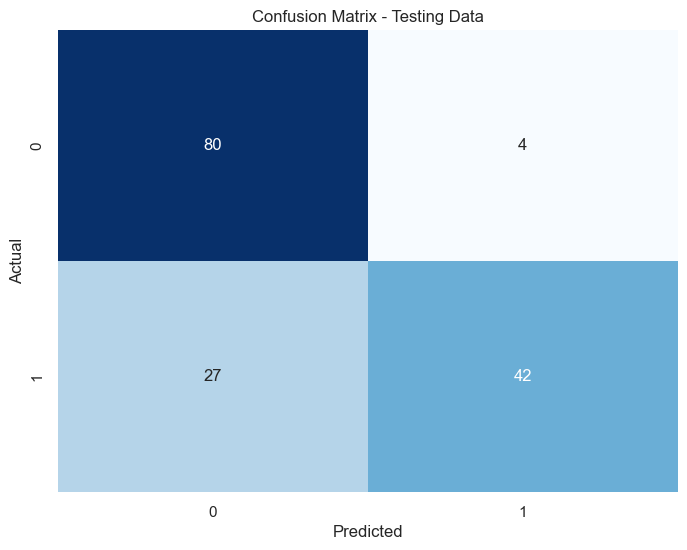

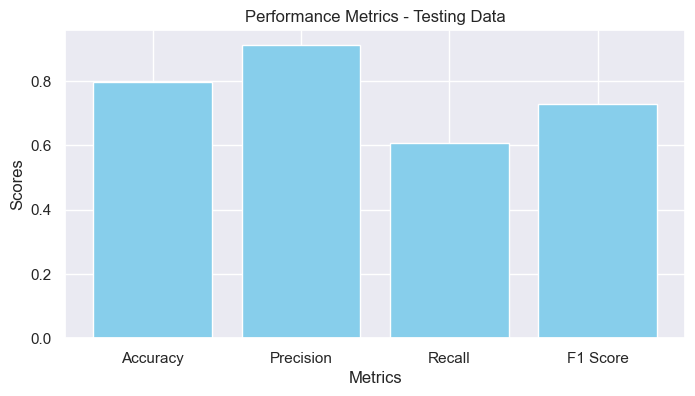

In [95]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Assuming x_train, y_train, x_test, y_test are defined earlier

# Flatten the image data
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Train a SVM using RBF kernel
clf = SVC(kernel='rbf')
clf.fit(x_train_flat, y_train)

# Store predictions and ground truth for training data
y_pred_train = clf.predict(x_train_flat)
y_true_train = y_train

# Use the SVM model to predict test data
y_pred_test = clf.predict(x_test_flat)
y_true_test = y_test

# Confusion Matrix Plot
plt.figure(figsize=(8, 6))
sns.heatmap(metrics.confusion_matrix(y_true_test, y_pred_test), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Testing Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Bar Plot for Performance Metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [metrics.accuracy_score(y_true_test, y_pred_test),
          metrics.precision_score(y_true_test, y_pred_test),
          metrics.recall_score(y_true_test, y_pred_test),
          metrics.f1_score(y_true_test, y_pred_test)]

plt.figure(figsize=(8, 4))
plt.bar(labels, scores, color='skyblue')
plt.title('Performance Metrics - Testing Data')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.show()


### 2.SVM Using Polynomial Kernel With Degree of 2

In [87]:
#Train a SVM using polynomial kernel with degree of 2
clf = svm.SVC(kernel = 'poly', degree = 2)
clf.fit(x_train, y_train)

#store predictions and ground truth
y_pred = clf.predict(x_train)
y_true = y_train

# SVM model to predict Test data
y_pred = clf.predict(x_test)
y_true = y_test

#assess the performance of the SVM with linear kernel on Testing data
print('Accuracy : ', metrics.accuracy_score(y_true, y_pred))
print('Precision : ', metrics.precision_score(y_true, y_pred))
print('Recall : ', metrics.recall_score(y_true, y_pred))
print('f1 : ', metrics.f1_score(y_true, y_pred)) 
print('Confusion matrix :', metrics.confusion_matrix(y_true, y_pred))

Accuracy :  0.7908496732026143
Precision :  0.8653846153846154
Recall :  0.6428571428571429
f1 :  0.7377049180327869
Confusion matrix : [[76  7]
 [25 45]]


### 3.Graph


Testing Data (Polynomial Kernel):
Accuracy: 0.7973856209150327
Precision: 0.9130434782608695
Recall: 0.6086956521739131
F1 Score: 0.7304347826086955
Confusion Matrix: [[80  4]
 [27 42]]

Testing Data (RBF Kernel):
Accuracy: 0.7712418300653595
Precision: 0.84
Recall: 0.6086956521739131
F1 Score: 0.7058823529411766
Confusion Matrix: [[76  8]
 [27 42]]


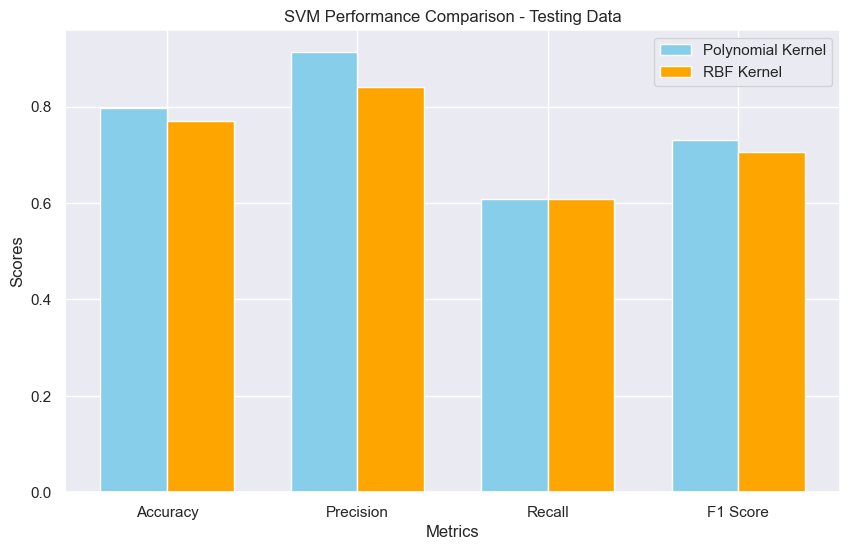

In [94]:
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming x_train, y_train, x_test, y_test are defined earlier

# Flatten the image data for RBF kernel
x_train_flat_rbf = x_train.reshape(x_train.shape[0], -1)
x_test_flat_rbf = x_test.reshape(x_test.shape[0], -1)

# Train a SVM using RBF kernel
clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(x_train_flat_rbf, y_train)

# Store predictions and ground truth for RBF kernel
y_pred_test_rbf = clf_rbf.predict(x_test_flat_rbf)
y_true_test_rbf = y_test

# Assess the performance of the SVM with RBF kernel on testing data
print('\nTesting Data (Polynomial Kernel):')
print('Accuracy:', metrics.accuracy_score(y_true_test_rbf, y_pred_test_rbf))
print('Precision:', metrics.precision_score(y_true_test_rbf, y_pred_test_rbf))
print('Recall:', metrics.recall_score(y_true_test_rbf, y_pred_test_rbf))
print('F1 Score:', metrics.f1_score(y_true_test_rbf, y_pred_test_rbf))
print('Confusion Matrix:', metrics.confusion_matrix(y_true_test_rbf, y_pred_test_rbf))

# Flatten the image data for Polynomial kernel
x_train_flat_poly = x_train.reshape(x_train.shape[0], -1)
x_test_flat_poly = x_test.reshape(x_test.shape[0], -1)

# Train a SVM using Polynomial kernel with degree of 2
clf_poly = SVC(kernel='poly', degree=2)
clf_poly.fit(x_train_flat_poly, y_train)

# Store predictions and ground truth for Polynomial kernel
y_pred_test_poly = clf_poly.predict(x_test_flat_poly)
y_true_test_poly = y_test

# Assess the performance of the SVM with Polynomial kernel on testing data
print('\nTesting Data (RBF Kernel):')
print('Accuracy:', metrics.accuracy_score(y_true_test_poly, y_pred_test_poly))
print('Precision:', metrics.precision_score(y_true_test_poly, y_pred_test_poly))
print('Recall:', metrics.recall_score(y_true_test_poly, y_pred_test_poly))
print('F1 Score:', metrics.f1_score(y_true_test_poly, y_pred_test_poly))
print('Confusion Matrix:', metrics.confusion_matrix(y_true_test_poly, y_pred_test_poly))

# Create a combined bar plot
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores_rbf = [metrics.accuracy_score(y_true_test_rbf, y_pred_test_rbf),
              metrics.precision_score(y_true_test_rbf, y_pred_test_rbf),
              metrics.recall_score(y_true_test_rbf, y_pred_test_rbf),
              metrics.f1_score(y_true_test_rbf, y_pred_test_rbf)]

scores_poly = [metrics.accuracy_score(y_true_test_poly, y_pred_test_poly),
               metrics.precision_score(y_true_test_poly, y_pred_test_poly),
               metrics.recall_score(y_true_test_poly, y_pred_test_poly),
               metrics.f1_score(y_true_test_poly, y_pred_test_poly)]

width = 0.35  # Width of the bars
ind = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(ind - width/2, scores_rbf, width, label='Polynomial Kernel', color='skyblue')
rects2 = ax.bar(ind + width/2, scores_poly, width, label='RBF Kernel', color='orange')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('SVM Performance Comparison - Testing Data')
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.show()


In [89]:
# #List where arrays shall be stored
# resized_image_array=[]
# #List that will store the answer if an image is female (0) or male (1)

#split the data to test and training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,y, test_size = 0.2)

#train SVM model
#from sklearn import svm
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train, y_train)
#store predictions and ground truth
y_pred = clf.predict(x_train)
y_true = y_train
print(y_pred)

#Now, use the SVM model to predict Test data


[1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 1
 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1
 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1
 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0
 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1
 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0
 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0
 0 1 0 0 0 1 1 0 0 1 0 0 

In [30]:
y_pred = clf.predict(x_test)
y_true = y_test
print(y_pred)
#assess the performance of the SVM with linear kernel on Testing data
# print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

[0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0
 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 0
 0 1 0 1 0]


In [36]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.7908496732026143


# Logisitic Regression

### 1.Using LR

In [117]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model with higher regularization
clf_logistic_low_accuracy = LogisticRegression(C=0.1)  # You can adjust the value of C
clf_logistic_low_accuracy.fit(x_train_flat, y_train)

# Store predictions and ground truth for training data
y_pred_train_logistic_low_accuracy = clf_logistic_low_accuracy.predict(x_train_flat)
y_true_train_logistic_low_accuracy = y_train

# Use the Logistic Regression model to predict test data
y_pred_test_logistic_low_accuracy = clf_logistic_low_accuracy.predict(x_test_flat)
y_true_test_logistic_low_accuracy = y_test

# Assess the performance of the Logistic Regression on testing data
print('\nLogistic Regression (Low Training Accuracy) - Testing Data:')
print('Accuracy:', metrics.accuracy_score(y_true_test_logistic_low_accuracy, y_pred_test_logistic_low_accuracy))
print('Precision:', metrics.precision_score(y_true_test_logistic_low_accuracy, y_pred_test_logistic_low_accuracy))
print('Recall:', metrics.recall_score(y_true_test_logistic_low_accuracy, y_pred_test_logistic_low_accuracy))
print('F1 Score:', metrics.f1_score(y_true_test_logistic_low_accuracy, y_pred_test_logistic_low_accuracy))
print('Confusion Matrix:', metrics.confusion_matrix(y_true_test_logistic_low_accuracy, y_pred_test_logistic_low_accuracy))



Logistic Regression (Low Training Accuracy) - Testing Data:
Accuracy: 0.7908496732026143
Precision: 0.8775510204081632
Recall: 0.6231884057971014
F1 Score: 0.7288135593220338
Confusion Matrix: [[78  6]
 [26 43]]


C:\Users\anura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 2.Using Polynomial Kernel

In [96]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
clf_logistic = LogisticRegression()
clf_logistic.fit(x_train, y_train)

# Store predictions and ground truth for training data
y_pred_train_logistic = clf_logistic.predict(x_train)
y_true_train_logistic = y_train

# Use the Logistic Regression model to predict test data
y_pred_test_logistic = clf_logistic.predict(x_test)
y_true_test_logistic = y_test

# Assess the performance of the Logistic Regression model on testing data
print('\nLogistic Regression - Testing Data:')
print('Accuracy : ', metrics.accuracy_score(y_true_test_logistic, y_pred_test_logistic))
print('Precision : ', metrics.precision_score(y_true_test_logistic, y_pred_test_logistic))
print('Recall : ', metrics.recall_score(y_true_test_logistic, y_pred_test_logistic))
print('F1 : ', metrics.f1_score(y_true_test_logistic, y_pred_test_logistic))
print('Confusion matrix :', metrics.confusion_matrix(y_true_test_logistic, y_pred_test_logistic))



Logistic Regression - Testing Data:
Accuracy :  0.803921568627451
Precision :  0.8823529411764706
Recall :  0.6521739130434783
F1 :  0.75
Confusion matrix : [[78  6]
 [24 45]]


C:\Users\anura\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN(K-Nearest Neighbour)

### 1.Using Polynomial Kernel

In [104]:
from sklearn.neighbors import KNeighborsClassifier

# Train a KNN classifier with polynomial kernel
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2)  # p=2 represents the Euclidean distance (default for Minkowski metric)

# Flatten the image data
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

knn_clf.fit(x_train_flat, y_train)

# Store predictions and ground truth for training data
y_pred_train_knn = knn_clf.predict(x_train_flat)
y_true_train_knn = y_train

# Use the KNN model with polynomial kernel to predict test data
y_pred_test_knn = knn_clf.predict(x_test_flat)
y_true_test_knn = y_test

# Assess the performance of the KNN with polynomial kernel on testing data
print('\nKNN (Polynomial Kernel) - Testing Data:')
print('Accuracy:', metrics.accuracy_score(y_true_test_knn, y_pred_test_knn))
print('Precision:', metrics.precision_score(y_true_test_knn, y_pred_test_knn))
print('Recall:', metrics.recall_score(y_true_test_knn, y_pred_test_knn))
print('F1 Score:', metrics.f1_score(y_true_test_knn, y_pred_test_knn))
print('Confusion Matrix:', metrics.confusion_matrix(y_true_test_knn, y_pred_test_knn))



KNN (Polynomial Kernel) - Testing Data:
Accuracy: 0.7581699346405228
Precision: 0.7580645161290323
Recall: 0.6811594202898551
F1 Score: 0.7175572519083969
Confusion Matrix: [[69 15]
 [22 47]]


### 2.Using Grid Search

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Flatten the image data
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Adjust the range of neighbors as needed
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance (L1), 2 for Euclidean distance (L2)
}

# Create a KNN classifier
knn_clf = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train_flat, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Print the best hyperparameters
print('Best Hyperparameters:', best_params)

# Get the best model from the grid search
best_knn_clf = grid_search.best_estimator_

# Use the best model to predict on testing data
y_pred_test_knn = best_knn_clf.predict(x_test_flat)

# Assess the performance of the best model on testing data
print('\nKNN - Testing Data (Best Model):')
print('Accuracy:', metrics.accuracy_score(y_true_test_knn, y_pred_test_knn))
print('Precision:', metrics.precision_score(y_true_test_knn, y_pred_test_knn))
print('Recall:', metrics.recall_score(y_true_test_knn, y_pred_test_knn))
print('F1 Score:', metrics.f1_score(y_true_test_knn, y_pred_test_knn))
print('Confusion Matrix:', metrics.confusion_matrix(y_true_test_knn, y_pred_test_knn))


Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

KNN - Testing Data (Best Model):
Accuracy: 0.8235294117647058
Precision: 0.9038461538461539
Recall: 0.6811594202898551
F1 Score: 0.7768595041322315
Confusion Matrix: [[79  5]
 [22 47]]


### 3.Graph

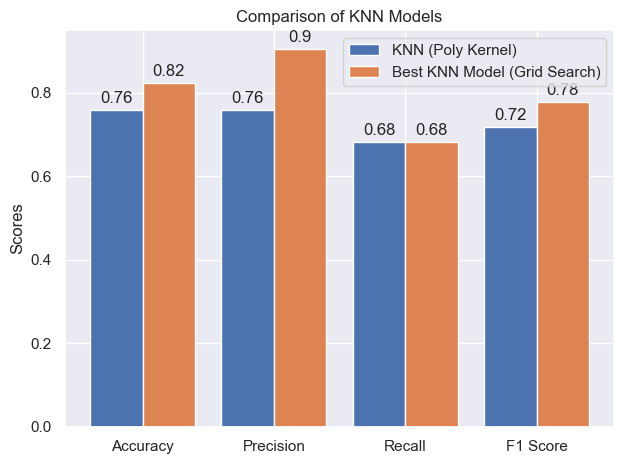

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics for KNN with Polynomial Kernel
metrics_knn_poly = {
    'Accuracy': 0.7581699346405228,
    'Precision': 0.7580645161290323,
    'Recall': 0.6811594202898551,
    'F1 Score': 0.7175572519083969,
}

# Performance metrics for the best KNN model
metrics_best_knn = {
    'Accuracy': 0.8235294117647058,
    'Precision': 0.9038461538461539,
    'Recall': 0.6811594202898551,
    'F1 Score': 0.7768595041322315,
}

# Bar graph
labels = list(metrics_knn_poly.keys())
x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots()

# Bar for KNN with Polynomial Kernel
rects1 = ax.bar(x - 0.2, list(metrics_knn_poly.values()), 0.4, label='KNN (Poly Kernel)')

# Bar for the best KNN model
rects2 = ax.bar(x + 0.2, list(metrics_best_knn.values()), 0.4, label='Best KNN Model (Grid Search)')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of KNN Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the values on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


# Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier

# Flatten the image data
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Train a Decision Tree classifier
clf_decision_tree = DecisionTreeClassifier()
clf_decision_tree.fit(x_train_flat, y_train)

# Store predictions and ground truth for training data
y_pred_train_decision_tree = clf_decision_tree.predict(x_train_flat)
y_true_train_decision_tree = y_train

# Use the Decision Tree model to predict test data
y_pred_test_decision_tree = clf_decision_tree.predict(x_test_flat)
y_true_test_decision_tree = y_test

# Assess the performance of the Decision Tree on testing data
print('\nDecision Tree - Testing Data:')
print('Accuracy:', metrics.accuracy_score(y_true_test_decision_tree, y_pred_test_decision_tree))
print('Precision:', metrics.precision_score(y_true_test_decision_tree, y_pred_test_decision_tree))
print('Recall:', metrics.recall_score(y_true_test_decision_tree, y_pred_test_decision_tree))
print('F1 Score:', metrics.f1_score(y_true_test_decision_tree, y_pred_test_decision_tree))
print('Confusion Matrix:', metrics.confusion_matrix(y_true_test_decision_tree, y_pred_test_decision_tree))



Decision Tree - Testing Data:
Accuracy: 0.803921568627451
Precision: 0.8545454545454545
Recall: 0.6811594202898551
F1 Score: 0.7580645161290324
Confusion Matrix: [[76  8]
 [22 47]]


In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Train a Decision Tree classifier with polynomial kernel-like behavior
decision_tree_clf = DecisionTreeClassifier(max_depth=2)  # You can adjust the depth based on your requirements
decision_tree_clf.fit(x_train, y_train)

# Store predictions and ground truth for training data
y_pred_train_decision_tree = decision_tree_clf.predict(x_train)
y_true_train_decision_tree = y_train

# Use the Decision Tree model to predict test data
y_pred_test_decision_tree = decision_tree_clf.predict(x_test)
y_true_test_decision_tree = y_test

# Assess the performance of the Decision Tree on testing data
print('\nDecision Tree - Testing Data:')
print('Accuracy:', metrics.accuracy_score(y_true_test_decision_tree, y_pred_test_decision_tree))
print('Precision:', metrics.precision_score(y_true_test_decision_tree, y_pred_test_decision_tree))
print('Recall:', metrics.recall_score(y_true_test_decision_tree, y_pred_test_decision_tree))
print('F1 Score:', metrics.f1_score(y_true_test_decision_tree, y_pred_test_decision_tree))
print('Confusion Matrix:', metrics.confusion_matrix(y_true_test_decision_tree, y_pred_test_decision_tree))



Decision Tree - Testing Data:
Accuracy: 0.7058823529411765
Precision: 0.7068965517241379
Recall: 0.5942028985507246
F1 Score: 0.6456692913385826
Confusion Matrix: [[67 17]
 [28 41]]


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Assuming x_train, y_train, x_test, y_test are already defined

# Flatten the image data
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Train a Random Forest classifier
clf_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
clf_random_forest.fit(x_train_flat, y_train)

# Store predictions and ground truth for training data
y_pred_train_random_forest = clf_random_forest.predict(x_train_flat)
y_true_train_random_forest = y_train

# Use the Random Forest model to predict test data
y_pred_test_random_forest = clf_random_forest.predict(x_test_flat)
y_true_test_random_forest = y_test

# Assess the performance of the Random Forest on testing data
print('\nRandom Forest - Testing Data:')
print('Accuracy:', metrics.accuracy_score(y_true_test_random_forest, y_pred_test_random_forest))
print('Precision:', metrics.precision_score(y_true_test_random_forest, y_pred_test_random_forest))
print('Recall:', metrics.recall_score(y_true_test_random_forest, y_pred_test_random_forest))
print('F1 Score:', metrics.f1_score(y_true_test_random_forest, y_pred_test_random_forest))
print('Confusion Matrix:', metrics.confusion_matrix(y_true_test_random_forest, y_pred_test_random_forest))


Random Forest - Testing Data:
Accuracy: 0.8823529411764706
Precision: 0.92
Recall: 0.7666666666666667
F1 Score: 0.8363636363636363
Confusion Matrix: [[89  4]
 [14 46]]


# Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Train a Gaussian Naive Bayes classifier
clf = GaussianNB()
clf.fit(x_train, y_train)

# Store predictions and ground truth for training data
y_pred_train = clf.predict(x_train)
y_true_train = y_train

# Assess the performance of the Naive Bayes on training data

# print('Accuracy:', metrics.accuracy_score(y_true_train, y_pred_train))
# print('Precision:', metrics.precision_score(y_true_train, y_pred_train))
# print('Recall:', metrics.recall_score(y_true_train, y_pred_train))
# print('F1 Score:', metrics.f1_score(y_true_train, y_pred_train))
# print('Confusion Matrix:', metrics.confusion_matrix(y_true_train, y_pred_train))

# Use the Naive Bayes model to predict test data
y_pred_test = clf.predict(x_test)
y_true_test = y_test

# Assess the performance of the Naive Bayes on testing data
print('\nNaive Bayes - Testing Data:')
print('Accuracy:', metrics.accuracy_score(y_true_test, y_pred_test))
print('Precision:', metrics.precision_score(y_true_test, y_pred_test))
print('Recall:', metrics.recall_score(y_true_test, y_pred_test))
print('F1 Score:', metrics.f1_score(y_true_test, y_pred_test))
print('Confusion Matrix:', metrics.confusion_matrix(y_true_test,y_pred_test))


Naive Bayes - Testing Data:
Accuracy: 0.6470588235294118
Precision: 0.5681818181818182
Recall: 0.4166666666666667
F1 Score: 0.48076923076923084
Confusion Matrix: [[74 19]
 [35 25]]
